# Example of Total Internal Reflection on the Glass / Air interface

Author: O. Castany, M.Müller

This notebook demonstrates the phenomenon of Total Internal Reflection (TIR) at the interface between glass and air using the pyElli library. The simulation calculates the reflection coefficients Rp and Rs as a function of the angle of incidence.

In [1]:
import elli
import matplotlib.pyplot as plt
import numpy as np

## Structure definition

The structure is defined as a simple interface between a denser medium (Glass, the incident half-space) and a less dense medium (Air, the outgoing half-space).

The critical angle for TIR is calculated by Snell's Law: Φ_c = arcsin(n_air / n_glass). With n_glass = 1.5 and n_air = 1.0, the critical angle should be Φ_c ≈ 41.81°.

In [2]:
# Refractive indices (wavelength is irrelevant for non-dispersive materials)
n_glass = 1.5
n_air = 1.0

# Materials:
# Isotropic material definition for Glass (Incident Medium)
glass = elli.IsotropicMaterial(elli.ConstantRefractiveIndex(n_glass))
# Isotropic material definition for Air (Outgoing Medium)
air = elli.IsotropicMaterial(elli.ConstantRefractiveIndex(n_air))

# Structure:
# Light is incident from the glass medium onto the air medium (Glass -> Air).
# The empty list '[]' indicates no intermediate layers.
s = elli.Structure(glass, [], air)

# Wavelength (a single value is sufficient for non-dispersive materials)
lbda = 1000  # nm

# Variation of incidence angle (Phi) from normal incidence to glancing incidence
Phi_list = np.linspace(0, 89, 90)

## Calculation

We iterate the pyElli evaluation over the list of incidence angles, Phi_list, to calculate the reflection and transmission properties for each angle. The results are collected into an elli.ResultList object for easy access.

In [3]:
data = elli.ResultList([s.evaluate(lbda, Phi_i) for Phi_i in Phi_list])

## Plotting

The plot displays the power reflection coefficients for p-polarized light (R_pp) and s-polarized light (R_ss) versus the angle of incidence. Total Internal Reflection occurs when both coefficients jump to 1.0 at the critical angle.

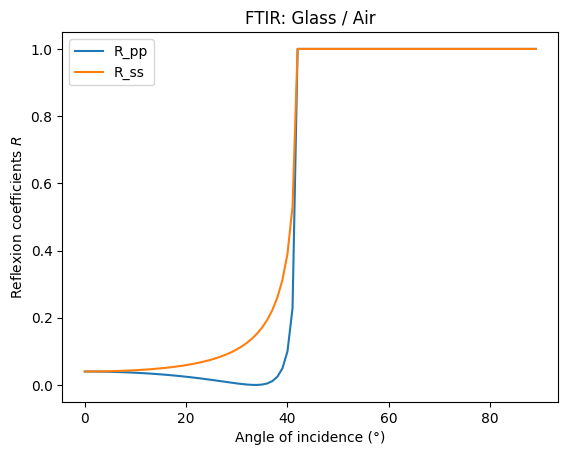

In [4]:
plt.figure()
plt.plot(Phi_list, data.R_pp, label="R_pp")
plt.plot(Phi_list, data.R_ss, label="R_ss")
plt.title("FTIR: Glass / Air")
plt.xlabel("Angle of incidence (°)")
plt.ylabel(r"Reflexion coefficients $R$")
plt.legend()
plt.show()